# FIGURE 5

In [1]:
# Import packages
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl 
from scipy.integrate import odeint
import seaborn as sns

colors=sns.color_palette("Set2")
sns.palplot(sns.color_palette("Set2"))

# Figure Size Setting
def set_fig_size(fig_width_pt,nrow=1,ncol=1):
    #Ysize_over_Xsize=(np.sqrt(5)-1)/2
    Ysize_over_Xsize=3/4

    fig_width_in = fig_width_pt/72.27
    
    fig_height_in=fig_width_in*Ysize_over_Xsize*(nrow/ncol)
    fig_dim = (fig_width_in, fig_height_in)
    return fig_dim

# these numbers come from the latex document
# using the commands 
#\showthe\columnwidth
# \showthe\textwidth
colwidth=229.5
textwidth=469


%matplotlib inline

# FIGURE STYLING
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

mpl.rcParams['axes.linewidth'] = 0.5 
mpl.rcParams['xtick.major.size'] = 3
mpl.rcParams['ytick.major.size'] = 3

mpl.rcParams['xtick.major.width'] = 0.5
mpl.rcParams['ytick.major.width'] = 0.5


mpl.rcParams['axes.titlesize'] = 10
mpl.rcParams['axes.labelsize'] = 9
mpl.rcParams['xtick.labelsize'] = 6
mpl.rcParams['ytick.labelsize'] = 6
mpl.rcParams['legend.fontsize'] = 7
mpl.rcParams['font.family'] = ['sans-serif']
mpl.rc('font',**{'family':'sans-serif','sans-serif':['Arial']})

In [2]:
def getX_Xa_Ya(X, t, pars):
    k2, delta, yd, Xss, s, k3, k4, k5, k6, YT = pars
    k1 = 1
    S = k2*s/k1
    kdstar = k2*(1-delta)/delta
    kd = kdstar/yd
    kp = Xss*kd
    
    dX=np.zeros(len(X))
    dX[0] = kp - (k1*S + kd)*X[0] + k2*X[1]
    dX[1] = k1*S*X[0] - (k2+kdstar)*X[1]
    dX[2] = (k3+k5*X[1])*(YT-X[2]) - (k4+k6*X[0])*X[2]
    return dX

def compute_zeta_kappa(pars):
    k2, delta, yd, Xss, s, k3, k4, k5, k6, YT = pars
    k1 = 1
    S = k2*s/k1
    kdstar = k2*(1-delta)/delta
    kd = kdstar/yd
    kp = Xss*kd
    
    
    kappa = np.sqrt(kd*(k2+kdstar) + k1*S*kdstar)
    zeta = (k1*S+k2+kd+kdstar)/(2*kappa)
    return zeta, kappa

def compute_IC(pars):
    k2, delta, yd, Xss, s, k3, k4, k5, k6, YT = pars
    x0=Xss
    xa0=0
    ya0=(k3*YT)/(k3+k4+k6*Xss)
    return x0,xa0,ya0


# running the code. we'll run it until 3*kappa as appropriate time 
#k2, delta, yd, Xss, s, k3, k4, k5, k6, YT = pars

derep_pars_adaptation = [10, 0.99, 1/100, 1, 100, 10, 0, 0, 100, 1]

act_pars_adaptation = [10,#k2
            0.75,#delta
            50,#yd
            1,#Xss
            1, #s 
            0, #k3
            10,#k4
            100,#k5 
            0,#k6
            1]#YT


derep_pars_sustained = [10, 0.99, 50, 1, 100, 10, 0, 0, 100, 1]

act_pars_sustained = [10,#k2
            0.75,#delta
            1/100,#yd
            1,#Xss
            1, #s 
            0, #k3
            10,#k4
            100,#k5 
            0,#k6
            1]#YT

zeta_d_adapt, kappa_d_adapt = compute_zeta_kappa(derep_pars_adaptation)
zeta_d_sus, kappa_d_sus = compute_zeta_kappa(derep_pars_sustained)

zeta_a_adapt, kappa_a_adapt = compute_zeta_kappa(act_pars_adaptation)
zeta_a_sus, kappa_a_sus = compute_zeta_kappa(act_pars_sustained)

timescale_d_adapt=1/(kappa_d_adapt*(zeta_d_adapt-np.sqrt(-1+zeta_d_adapt**2)))
timescale_d_sus=1/(kappa_d_adapt*(zeta_d_sus-np.sqrt(-1+zeta_d_sus**2)))
timescale_a_adapt=1/(kappa_a_adapt*(zeta_a_adapt-np.sqrt(-1+zeta_a_adapt**2)))
timescale_a_sus=1/(kappa_a_sus*(zeta_a_sus-np.sqrt(-1+zeta_a_sus**2)))



x0d_adapt,xa0d_adapt,ya0d_adapt=compute_IC(derep_pars_adaptation)
x0d_sus,xa0d_sus,ya0d_sus=compute_IC(derep_pars_sustained)

x0a_adapt,xa0a_adapt,ya0a_adapt=compute_IC(act_pars_adaptation)
x0a_sus,xa0a_sus,ya0a_sus=compute_IC(act_pars_sustained)


timed_adapt = np.linspace(0,2*timescale_d_adapt,1001)
timea_adapt = np.linspace(0,8*timescale_a_adapt,1001)

timed_sus = np.linspace(0,2*timescale_d_sus,1001)
timea_sus = np.linspace(0,8*timescale_a_sus,1001)

sol_ode_derepression_adapt=sp.integrate.odeint(getX_Xa_Ya,[x0d_adapt,xa0d_adapt,ya0d_adapt], timed_adapt, args=(derep_pars_adaptation,),rtol='1e-12',mxstep=5000000)
sol_ode_activation_adapt=sp.integrate.odeint(getX_Xa_Ya,[x0a_adapt,xa0a_adapt,ya0a_adapt], timea_adapt, args=(act_pars_adaptation,),rtol='1e-12',mxstep=5000000)

sol_ode_derepression_sus=sp.integrate.odeint(getX_Xa_Ya,[x0d_sus,xa0d_sus,ya0d_sus], timed_sus, args=(derep_pars_sustained,),rtol='1e-12',mxstep=5000000)
sol_ode_activation_sus=sp.integrate.odeint(getX_Xa_Ya,[x0a_sus,xa0a_sus,ya0a_sus], timea_sus, args=(act_pars_sustained,),rtol='1e-12',mxstep=5000000)

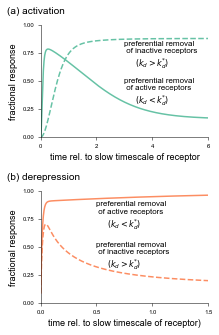

In [3]:
# Plotting together
fig=plt.figure(figsize=set_fig_size(colwidth,2,1))

gs = mpl.gridspec.GridSpec(2,1)

A = fig.add_subplot(gs[0,0])
B = fig.add_subplot(gs[1,0])


#A.plot(timea_adapt/timescale_a_adapt,sol_ode_activation_adapt[:,1],'--', label='active receptors', color='k')
A.plot(timea_adapt/timescale_a_adapt,sol_ode_activation_adapt[:,2],color=colors[0])
A.plot(timea_sus/timescale_a_sus,sol_ode_activation_sus[:,2],'--',color=colors[0])

A.set_xticks([0,2.0, 4.0, 6.0])
A.set_yticks([0, 0.25, 0.5, 0.75, 1])


A.text(3,0.63, "preferential removal \n" + " of inactive receptors \n" +r"     $(k_d>k_d^{*})$  ",fontsize=8)

A.text(3,0.3, "preferential removal \n" + " of active receptors \n" +r"     $(k_d < k_d^{*})$  ",fontsize=8)


A.set_xlabel('time rel. to slow timescale of receptor')
A.set_ylabel('fractional response')
A.set_xlim(0,6)
A.set_ylim(0,1)
A.text(-0.2,1.1,'(a) activation',transform=A.transAxes,fontsize=10)



#B.plot(timed_adapt/timescale_d_adapt,sol_ode_derepression_adapt[:,0],label='inactive receptors', color='k')
B.plot(timed_adapt/timescale_d_adapt,sol_ode_derepression_adapt[:,2],'--', color=colors[1])
B.plot(timed_sus/timescale_d_sus,sol_ode_derepression_sus[:,2], color=colors[1])

B.set_xticks([0, 0.5, 1, 1.5])
B.set_yticks([0, 0.25, 0.5, 0.75, 1])

B.text(0.5,0.68, "preferential removal \n" + " of active receptors \n" +r"     $(k_d < k_d^{*})$  ",fontsize=8)

B.text(0.5,0.32, "preferential removal \n" + " of inactive receptors \n" +r"     $(k_d>k_d^{*})$  ",fontsize=8)


B.set_xlabel('time rel. to slow timescale of receptor)')
B.set_ylabel('fractional response')
B.set_xlim(0,1.5)
B.set_ylim(0,1)
B.text(-0.2,1.1,'(b) derepression',transform=B.transAxes,fontsize=10)

gs.tight_layout(fig)
plt.savefig('../fig_pdfs_for_paper/fig5.pdf',bbox_inches = 'tight', pad_inches = 0)